# Classifying movie rating to Positive or Negative
 The following model will classify movie reviews as positive and negative using Naive Bayes Classifier. 
 Data source: https://ai.stanford.edu/~amaas/data/sentiment/ 

In [1]:
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [2]:
def list_directories(folder_path, sentiment, start_id):
    data = []
    
    for file in os.listdir(folder_path):
        with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
            review = f.read().strip()
            rating = file.split('_')[1].split('.')[0]
            data.append((start_id, rating, review, sentiment))
            start_id += 1  # Increment unique ID
    
    return data, start_id

In [3]:
start_id = 0  # Initialize unique ID counter

# Load data and update id counter after each call
data, start_id = list_directories("aclImdb/train/neg/", 0, start_id)
new_data, start_id = list_directories("aclImdb/train/pos/", 1, start_id)
data.extend(new_data)

new_data, start_id = list_directories("aclImdb/test/pos/", 1, start_id)
data.extend(new_data)

new_data, start_id = list_directories("aclImdb/test/neg/", 0, start_id)
data.extend(new_data)

# Output results
print(len(data))  # Total number of reviews
print(data[12501])  # Print the 12502th review (0-based index)
random.shuffle(data)
print(data[12501])  

50000
(12501, '10', 'I think this still is the best routine. There are some others, like Rock\'s "bring the pain", and Allen\'s "Men are Pigs" that are hilarious; "Damon Waynes last stand" is also funny in a tearful way - but this routine has no errors. All the jokes are funny, and the time limit of 70 minutes is perfect. Just long enough to last 20 years. I just love how he allows the audience to be totally themselves and unrestricted. I\'m a fan of the classics and for a guy who watched a lot of of Jim Carrey growing up, watching a more laid back comic is pretty cool. Not putting in a category with Ellen and Newhart, but something you can watch if you\'re bloated. Thanks Eddie, god bless.', 1)
(5436, '4', 'Tierney\'s an authentic tough guy, but this movie misfire from normally competent RKO undercuts his impact at every turn. The script is about as plausible as OJ Simpson at a Ten Cmmandments dinner. Just count the times Tierney\'s incredible car companions swallow one lame excuse af

In [4]:
import csv
csv_filename = "movie_reviews.csv"
# Write data to CSV file
with open(csv_filename, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["id", "rating", "review", "sentiment"])
    writer.writerows(data)

print(f"CSV file '{csv_filename}' saved successfully!")

CSV file 'movie_reviews.csv' saved successfully!


In [5]:
df = pd.read_csv("movie_reviews.csv")
df.head

<bound method NDFrame.head of           id  rating                                             review  \
0      40221       1  This film is absolutely appalling and awful. I...   
1       8478       4  TYSON <br /><br />Aspect ratio: 1.33:1<br /><b...   
2      16525      10  Will and Ted's Bodacious journey is an existen...   
3       7481       4  This movie has a slew of great adult stars but...   
4      48130       1  This movie is about a group of people who are ...   
...      ...     ...                                                ...   
49995  24086       8  When I saw this animation for first time (I wa...   
49996  26551      10  "Müllers Büro" is a movie which many will watc...   
49997  28302       9  Finally a true horror movie. This is the first...   
49998  13064       7  Mardi Gras: Made in china is an excellent movi...   
49999  38153       1  An obvious vanity press for Julie in her first...   

       sentiment  
0              0  
1              0  
2           

In [6]:
df.groupby('sentiment').describe()

id                                                     \
             count     mean           std      min       25%      50%   
sentiment                                                               
0          25000.0  24999.5  19094.447286      0.0   6249.75  24999.5   
1          25000.0  24999.5   7217.022701  12500.0  18749.75  24999.5   

                               rating                                          \
                75%      max    count     mean       std  min  25%  50%   75%   
sentiment                                                                       
0          43749.25  49999.0  25000.0  2.22004  1.186558  1.0  1.0  2.0   3.0   
1          31249.25  37499.0  25000.0  8.77064  1.157380  7.0  8.0  9.0  10.0   

                 
            max  
sentiment        
0           4.0  
1          10.0

In [7]:
df["review"] = df["review"].str.lower()
df.head

<bound method NDFrame.head of           id  rating                                             review  \
0      40221       1  this film is absolutely appalling and awful. i...   
1       8478       4  tyson <br /><br />aspect ratio: 1.33:1<br /><b...   
2      16525      10  will and ted's bodacious journey is an existen...   
3       7481       4  this movie has a slew of great adult stars but...   
4      48130       1  this movie is about a group of people who are ...   
...      ...     ...                                                ...   
49995  24086       8  when i saw this animation for first time (i wa...   
49996  26551      10  "müllers büro" is a movie which many will watc...   
49997  28302       9  finally a true horror movie. this is the first...   
49998  13064       7  mardi gras: made in china is an excellent movi...   
49999  38153       1  an obvious vanity press for julie in her first...   

       sentiment  
0              0  
1              0  
2           

In [8]:
X = df["review"]
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_df = pd.DataFrame({"review": X_train, "sentiment": y_train})
test_df = pd.DataFrame({"review": X_test, "sentiment": y_test})
train_df.to_csv("train_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)

print("Data successfully split and saved!")


Data successfully split and saved!


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
df = pd.read_csv("train_split.csv")
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df["review"])
print(X_train.shape)  


(40000, 93145)


In [10]:
df_test = pd.read_csv("test_split.csv")
X_test = vectorizer.transform(df_test["review"])

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

y_train = df["sentiment"]
y_test = df_test["sentiment"]
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.85


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      5000
           1       0.87      0.82      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



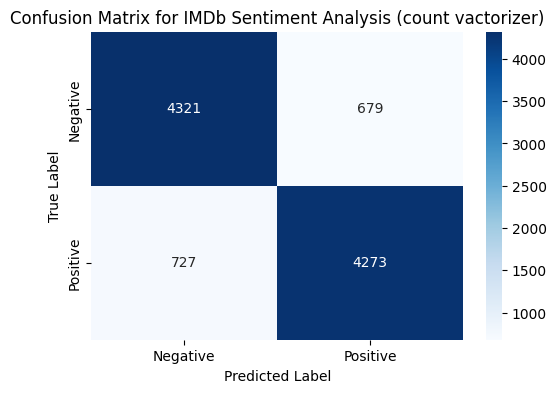

In [18]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for IMDb Sentiment Analysis (count vactorizer)")
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)  
X_train = vectorizer.fit_transform(df["review"])
print(X_train.shape)

(40000, 10000)


In [14]:
df_test = pd.read_csv("test_split.csv")
X_test = vectorizer.transform(df_test["review"])

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
y_train = df["sentiment"]
y_test = df_test["sentiment"]
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5000
           1       0.86      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



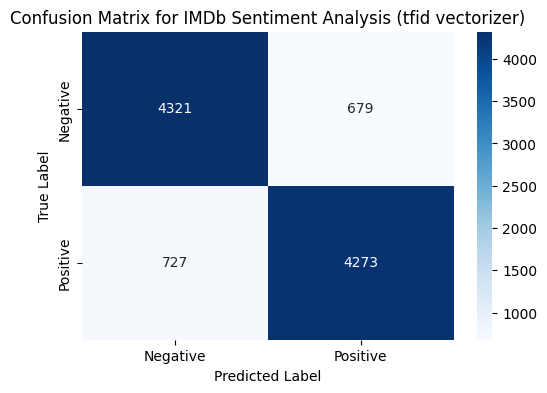

In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for IMDb Sentiment Analysis (tfid vectorizer)")
plt.show()
